In [1]:
import pandas as pd
df = pd.read_csv("/Users/sarahasad/Downloads/tips.csv")

In [2]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
df['day'].describe()

count     244
unique      4
top       Sat
freq       87
Name: day, dtype: object

In [7]:
df['day'].unique()
#df.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [8]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [9]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['day'] = label_encoder.fit_transform(df['day'])
df['time'] = label_encoder.fit_transform(df['time'])

In [10]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df[['total_bill','tip']])

/Users/sarahasad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

<Axes: xlabel='total_bill', ylabel='tip'>

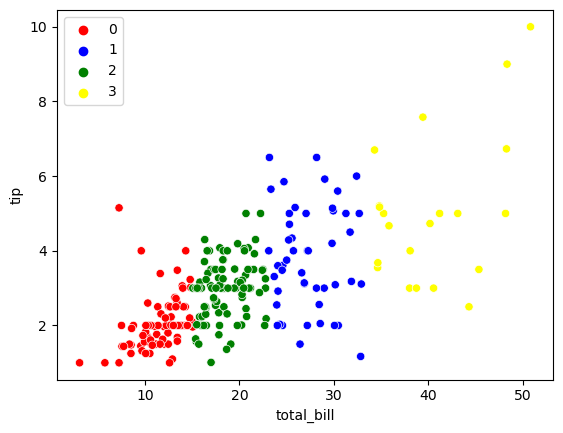

In [12]:
import seaborn as sns
sns.scatterplot(x= 'total_bill', y = 'tip', data=df, hue=kmeans.labels_, palette=['red', 'blue', 'green','yellow'])

In [13]:
#sns.scatterplot(x= 'total_bill', y = 'tip', data=df, hue = kmeans.cluster_centers_, palette=['red', 'blue', 'green','yellow'])

In [14]:
df["Cluster"] = kmeans.labels_

In [15]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,Cluster
0,16.99,1.01,0,0,2,0,2,2
1,10.34,1.66,1,0,2,0,3,0
2,21.01,3.50,1,0,2,0,3,2
3,23.68,3.31,1,0,2,0,2,1
4,24.59,3.61,0,0,2,0,4,1


In [16]:
df.to_csv('Desktop/clusterfile.csv')

In [17]:
#To remove warnings
import warnings 
warnings.filterwarnings('ignore')

In [18]:
from sklearn.metrics import silhouette_score 
K = range(2,10)
fits= []
score= []

for k in K:
    model = KMeans(n_clusters=k, random_state=0).fit(df[['total_bill','tip']])
    fits.append(model)
    
    score.append(silhouette_score(df[['total_bill','tip']], model.labels_, metric='euclidean'))
    
  
max_score_index = score.index(max(score))
best_model = fits[max_score_index]

print("Best silhouette score:", max(score))
print("Best model:", best_model) #Give the model where no of clusters are best

Best silhouette score: 0.6090140286091169
Best model: KMeans(n_clusters=2, random_state=0)


[Text(0.5, 1.0, 'Cluster-Score Comparison'),
 Text(0.5, 0, 'cluster'),
 Text(0, 0.5, 'score')]

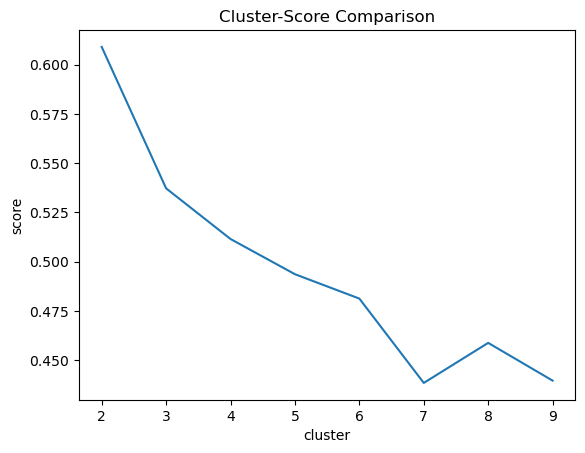

In [19]:
ax=sns.lineplot(x=K, y=score)
ax.set(title= 'Cluster-Score Comparison', xlabel = 'cluster', ylabel = 'score')

In [20]:
#X = df[['total_bill', 'tip']]
X = df.iloc[:, [0, 1]].values #selecting total_bill and tip

In [21]:
#Parameter tuning using GridSearchCV 
from sklearn.model_selection import GridSearchCV 
  
param_grid = {"n_clusters": range(2, 11)}  
model = KMeans() 
grid_search = GridSearchCV(model, param_grid) 
grid_search.fit(X) 

#print(grid_search.best_params_) 
print(f"Best hyperparameters found by GridSearchCV: {grid_search.best_params_}")

Best hyperparameters found by GridSearchCV: {'n_clusters': 10}


In [22]:
#Parameter tuning using RandomizedSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

param_distributions = {"n_clusters": range(2, 11)}   
model = KMeans() 
random_search = RandomizedSearchCV(model, param_distributions) 
random_search.fit(X) 
  

#print(random_search.best_params_)
print(f"Best hyperparameters found by RandomizedSearchCV: {random_search.best_params_}") 

Best hyperparameters found by RandomizedSearchCV: {'n_clusters': 10}


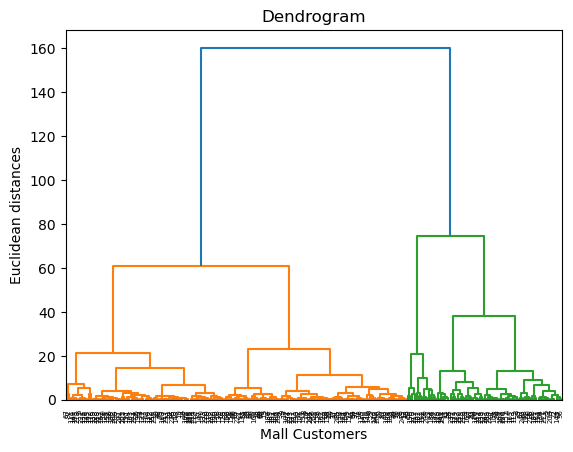

In [23]:
#Dendogram to check feasible no of clusters
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Mall Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [1]:
#Feasible no of clusters as per:
1.Silhouette score: n_clusters=2
2.Lineplot(uses elbow method): n_clusters=2
3.GridSearchCV: n_clusters= 10
4.RandomizedSearchCV: n_clusters= 10